<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(3_6)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_3.6'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_3.6_n250.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,36.492898,26.525209,65.317742,429.303673,567.639522,201.617390,366.022132
1,0.0,1.0,54.495363,51.893265,77.715465,372.957810,567.061904,213.489369,353.572535
2,0.0,2.0,94.784888,69.738889,54.909648,2558.014627,2787.448052,203.067647,2584.380405
3,0.0,3.0,90.402539,77.955113,47.630837,2568.740732,2794.729221,72.020617,2722.708604
4,0.0,4.0,38.783225,66.582588,50.098292,-4150.884529,-3985.420424,-161.260905,-3824.159518
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,46.235835,70.214307,39.466361,-1537.482794,-1371.566292,-140.474641,-1231.091651
249996,999.0,246.0,98.385925,45.158504,53.321148,-1622.685918,-1415.820340,392.125034,-1807.945374
249997,999.0,247.0,97.611830,51.401955,29.261671,-1869.313106,-1681.037650,147.313143,-1828.350794
249998,999.0,248.0,26.709307,32.112791,36.750643,447.080233,552.652974,-181.299541,733.952516


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...       y_hat        e_hat
rep   index                        ...                         
0.0   0.0    36.492898  26.525209  ...  201.617390   366.022132
      1.0    54.495363  51.893265  ...  213.489369   353.572535
      2.0    94.784888  69.738889  ...  203.067647  2584.380405
      3.0    90.402539  77.955113  ...   72.020617  2722.708604
      4.0    38.783225  66.582588  ... -161.260905 -3824.159518
...                ...        ...  ...         ...          ...
999.0 245.0  46.235835  70.214307  ... -140.474641 -1231.091651
      246.0  98.385925  45.158504  ...  392.125034 -1807.945374
      247.0  97.611830  51.401955  ...  147.313143 -1828.350794
      248.0  26.709307  32.112791  ... -181.299541   733.952516
      249.0  34.816609  51.338558  ... -283.128057   -47.887459

[250000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...       y_hat        e_hat
rep   index                        ...                         
0.0   0.0    36.492898  26.525209  ...  201.617390   366.022132
      1.0    54.495363  51.893265  ...  213.489369   353.572535
      2.0    94.784888  69.738889  ...  203.067647  2584.380405
      3.0    90.402539  77.955113  ...   72.020617  2722.708604
      4.0    38.783225  66.582588  ... -161.260905 -3824.159518
...                ...        ...  ...         ...          ...
999.0 245.0  46.235835  70.214307  ... -140.474641 -1231.091651
      246.0  98.385925  45.158504  ...  392.125034 -1807.945374
      247.0  97.611830  51.401955  ...  147.313143 -1828.350794
      248.0  26.709307  32.112791  ... -181.299541   733.952516
      249.0  34.816609  51.338558  ... -283.128057   -47.887459

[250000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,36.492898,26.525209,65.317742,429.303673,567.639522,201.617390,366.022132
1,0.0,1.0,54.495363,51.893265,77.715465,372.957810,567.061904,213.489369,353.572535
2,0.0,2.0,94.784888,69.738889,54.909648,2558.014627,2787.448052,203.067647,2584.380405
3,0.0,3.0,90.402539,77.955113,47.630837,2568.740732,2794.729221,72.020617,2722.708604
4,0.0,4.0,38.783225,66.582588,50.098292,-4150.884529,-3985.420424,-161.260905,-3824.159518
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,46.235835,70.214307,39.466361,-1537.482794,-1371.566292,-140.474641,-1231.091651
249996,999.0,246.0,98.385925,45.158504,53.321148,-1622.685918,-1415.820340,392.125034,-1807.945374
249997,999.0,247.0,97.611830,51.401955,29.261671,-1869.313106,-1681.037650,147.313143,-1828.350794
249998,999.0,248.0,26.709307,32.112791,36.750643,447.080233,552.652974,-181.299541,733.952516


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2  ...       y_hat        e_hat
rep   index                        ...                         
0.0   0.0    36.492898  26.525209  ...  201.617390   366.022132
      1.0    54.495363  51.893265  ...  213.489369   353.572535
      2.0    94.784888  69.738889  ...  203.067647  2584.380405
      3.0    90.402539  77.955113  ...   72.020617  2722.708604
      4.0    38.783225  66.582588  ... -161.260905 -3824.159518
...                ...        ...  ...         ...          ...
999.0 245.0  46.235835  70.214307  ... -140.474641 -1231.091651
      246.0  98.385925  45.158504  ...  392.125034 -1807.945374
      247.0  97.611830  51.401955  ...  147.313143 -1828.350794
      248.0  26.709307  32.112791  ... -181.299541   733.952516
      249.0  34.816609  51.338558  ... -283.128057   -47.887459

[250000 rows x 7 columns]

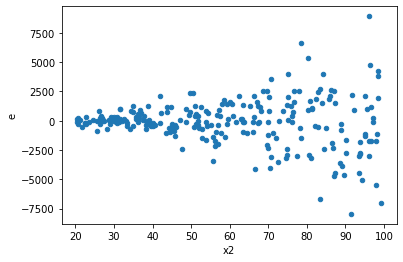

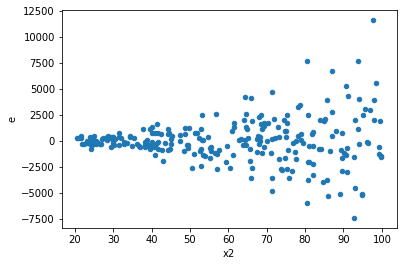

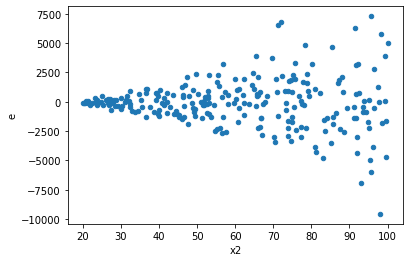

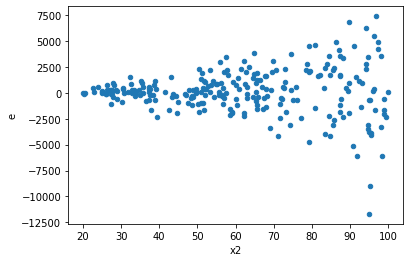

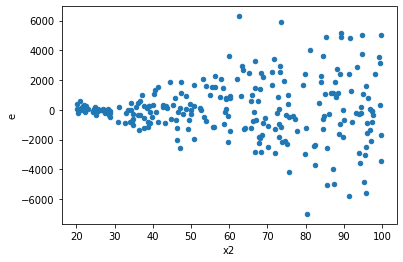

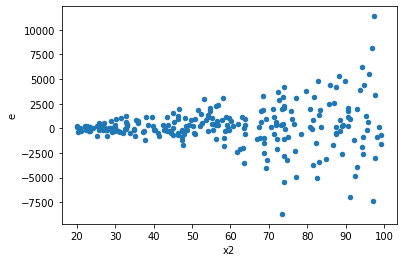

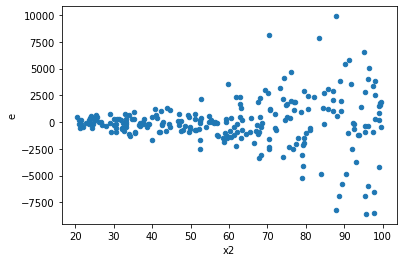

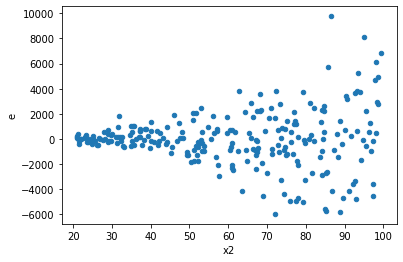

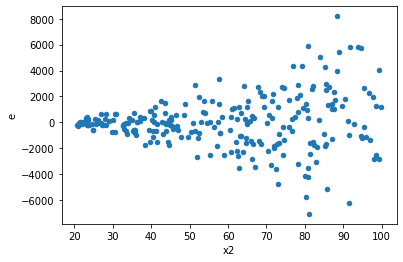

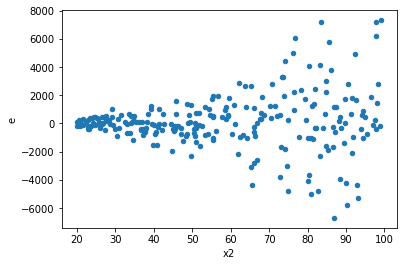

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,116.0,128.0,197083337.59744734,756111266.1153665,1698994.2896331667,5907119.2665263,3.4768329137831997,1.7920553929684502e-11,0.9999999999910397,8.960276964842251e-12,Reject001=0 : Heteroscedasticity
2.0,124.0,120.0,276475568.0276779,774573799.8128979,2229641.677642564,6454781.665107483,2.8949861001576846,1.1187716975058493e-08,0.9999999944061415,5.593858487529246e-09,Reject001=0 : Heteroscedasticity
3.0,122.0,122.0,612101104.7660574,622898666.6399345,5017222.170213585,5105726.775737168,1.0176401607345635,0.9232240305154238,0.5383879847422881,0.4616120152577119,Reject001=1 : Homoscedasticity
5.0,132.0,112.0,430514160.0144699,649947499.3850474,3261470.9092005296,5803102.673080781,1.7792900303695398,0.00184149728415961,0.9990792513579202,0.000920748642079805,Reject001=0 : Heteroscedasticity
8.0,103.0,141.0,104339113.17242536,880915617.192049,1013001.0987614113,6247628.490723752,6.167444930082189,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
10.0,108.0,136.0,271029726.9457005,733729170.4613668,2509534.5087564862,5395067.429862991,2.149827950577309,2.5756671504284512e-05,0.9999871216642479,1.2878335752142256e-05,Reject001=0 : Heteroscedasticity
12.0,138.0,106.0,405144316.4275748,582188210.637398,2935828.3799099624,5492341.609786774,1.8707979142688225,0.0008300601184398904,0.99958496994078,0.0004150300592199452,Reject001=0 : Heteroscedasticity
14.0,119.0,125.0,348539552.09690404,699990663.8057289,2928903.7991336472,5599925.310445831,1.9119526261334554,0.00038346443051207046,0.999808267784744,0.00019173221525603523,Reject001=0 : Heteroscedasticity
16.0,119.0,125.0,378903879.7342337,612077434.3645228,3184066.2162540643,4896619.474916182,1.537851018901508,0.0178903315030976,0.9910548342484512,0.0089451657515488,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,116.0,128.0,197083337.59744734,756111266.1153665,1698994.2896331667,5907119.2665263,3.4768329137831997,1.7920553929684502e-11,Reject001=0 : Heteroscedasticity
1.0,116.0,128.0,961861056.7327695,198713466.90590414,8291905.661489392,1552448.9602023761,0.18722462888265967,5.1122067517128125e-18,Reject001=0 : Heteroscedasticity
2.0,124.0,120.0,276475568.0276779,774573799.8128979,2229641.677642564,6454781.665107483,2.8949861001576846,1.1187716975058493e-08,Reject001=0 : Heteroscedasticity
3.0,122.0,122.0,612101104.7660574,622898666.6399345,5017222.170213585,5105726.775737168,1.0176401607345635,0.9232240305154238,Reject001=1 : Homoscedasticity
4.0,130.0,114.0,643980408.4812526,309869191.5428229,4953695.449855789,2718150.8030072185,0.548711730570023,0.0009609686779142364,Reject001=0 : Heteroscedasticity
5.0,132.0,112.0,430514160.0144699,649947499.3850474,3261470.9092005296,5803102.673080781,1.7792900303695398,0.00184149728415961,Reject001=0 : Heteroscedasticity
6.0,118.0,126.0,916103702.6254721,410402432.7440956,7763590.700215865,3257162.1646356797,0.4195432616695152,2.7416632980165692e-06,Reject001=0 : Heteroscedasticity
7.0,144.0,100.0,868024623.7322283,318880636.86633414,6027948.775918252,3188806.3686633413,0.5290035611123094,0.00046430561595684866,Reject001=0 : Heteroscedasticity
8.0,103.0,141.0,104339113.17242536,880915617.192049,1013001.0987614113,6247628.490723752,6.167444930082189,2.220446049250313e-16,Reject001=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    716
Reject001=1 : Homoscedasticity      284
Name: Result_test, dtype: int64